# Species Segmentation K Means Clustering

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [2]:
data = pd.read_csv('iris_dataset.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plot the data

Text(0, 0.5, 'Width of sepal')

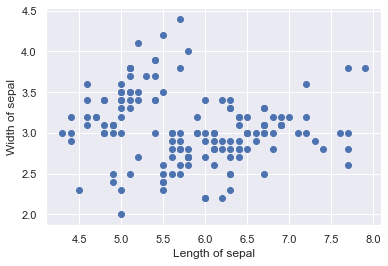

In [3]:
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')

## Clustering (unscaled data)

In [4]:
x = data.copy()
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [5]:
clusters = data.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

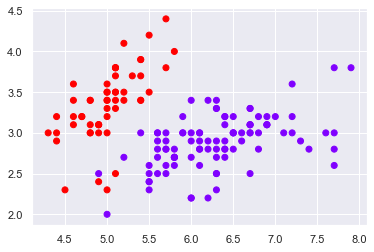

In [6]:
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')

## Standardize the variables

In [7]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## Clustering (scaled data)

In [8]:
kmeans_scaled = KMeans(2)
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [9]:
clusters_scaled = data.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

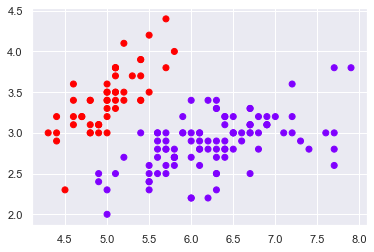

In [10]:
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')

## Elbow Method

### WCSS

In [12]:
wcss = []

cl_num = 12
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[600.0000000000003,
 223.73200573676343,
 140.96581663074699,
 114.6822160993797,
 91.1543680779766,
 80.23060704506956,
 72.04388181072012,
 63.74979956962884,
 54.34294607489976,
 47.67670993702451,
 42.95383807545633]

Text(0, 0.5, 'Within-cluster Sum of Squares')

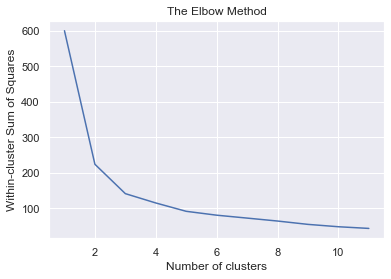

In [13]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

## Understanding the Elbow Curve

## 2 clusters

In [14]:
kmeans_2 = KMeans(2)
kmeans_2.fit(x_scaled)

KMeans(n_clusters=2)

In [15]:
clusters_2 = x.copy()
clusters_2['cluster_pred']=kmeans_2.fit_predict(x_scaled)

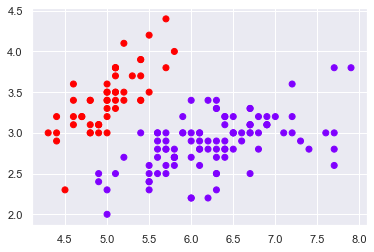

In [16]:
plt.scatter(clusters_2['sepal_length'], clusters_2['sepal_width'], c= clusters_2 ['cluster_pred'], cmap = 'rainbow')

## 3 Clusters

In [17]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

KMeans(n_clusters=3)

In [18]:
clusters_3 = x.copy()
clusters_3['cluster_pred']=kmeans_3.fit_predict(x_scaled)

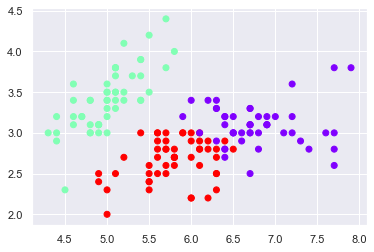

In [19]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')

## 5 Clusters

In [20]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

KMeans(n_clusters=5)

In [21]:
clusters_5 = x.copy()
clusters_5['cluster_pred']=kmeans_5.fit_predict(x_scaled)

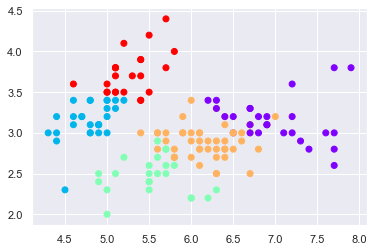

In [22]:
plt.scatter(clusters_5['sepal_length'], clusters_5['sepal_width'], c= clusters_5 ['cluster_pred'], cmap = 'rainbow')

## Original iris dataset

In [23]:
real_data = pd.read_csv('iris_with_answers.csv')

In [24]:
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [25]:
real_data['species'] = real_data['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})

In [26]:
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Scatter plots

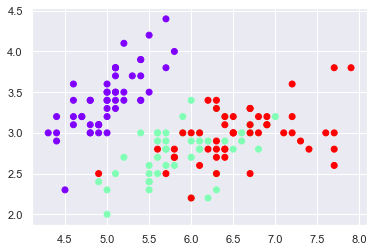

In [27]:
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c= real_data ['species'], cmap = 'rainbow')

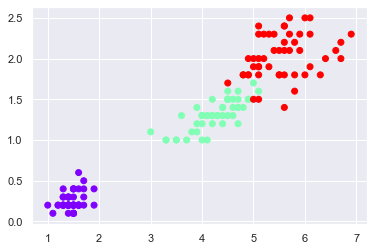

In [28]:
plt.scatter(real_data['petal_length'], real_data['petal_width'], c= real_data ['species'], cmap = 'rainbow')

#### Our clustering solution data

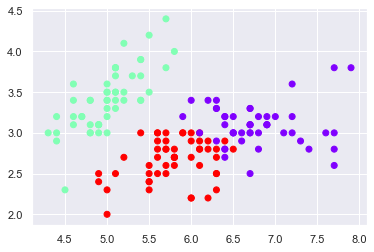

In [29]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')

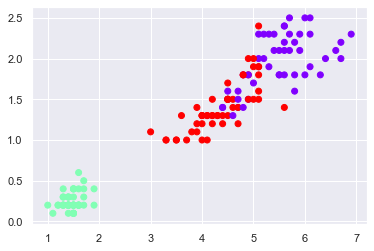

In [30]:
plt.scatter(clusters_3['petal_length'], clusters_3['petal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')

# END!!!